# Explainable AI bike sharing Example 
The book that this notebook is implementing is available at: https://christophm.github.io/interpretable-ml-book/

# Importing the relevant libraries 

In [3]:
#importing pandas to read the CSV file. The CSV file can be downloaded from the link UCI- Machine Learning Laboratory 
#The link to download the data is http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. Download the data set and 
# put it in the same folder as this file 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn import preprocessing

# The features of the data set are shown below
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv 

- instant: record index 
- dteday : date 
- season : season (1:winter, 2:spring, 3:summer, 4:fall) 
- yr : year (0: 2011, 1:2012) 
- mnth : month ( 1 to 12) 
- hr : hour (0 to 23) 
- holiday : weather day is holiday or not (extracted from [Web Link]) 
- weekday : day of the week 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 
- hum: Normalized humidity. The values are divided to 100 (max) 
- windspeed: Normalized wind speed. The values are divided to 67 (max) 
- casual: count of casual users 
- registered: count of registered users 
- cnt: count of total rental bikes including both casual and registered 



In [4]:

#Reading the CSV file 
bike_data_day=pd.read_csv('day.csv')
bike_data_hour=pd.read_csv('hour.csv')
#seeing the dataset
bike_data_hour.head()
bike_data_day.head()







,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#one hot encoding for better explaianability It is important to do that with categorical features, the weights for each 
#category of features can give the respective change in the output per category. In this case it would be 
#the number of bicycles (+ve or -ve) for each weather category 
feature_names=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
newpd=bike_data_day[feature_names]
newpd=pd.get_dummies(newpd['season'], prefix='season')
newpdyear=pd.get_dummies(bike_data_day['yr'],prefix='yr')
pd.concat(newpdyear,newpd)



TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

# Predicting the number of rented bikes on a particular day

In [3]:
#defining a regressor
reg= linear_model.LinearRegression()
#predicting count based on all other features 
#Converting the df into a numpy array 
#X represents the input features 
#Y represents the Ouput features 

bike_data_day_np=bike_data_day.to_numpy()
#Spliting into input and output features

X=bike_data_day_np[:,2:13]
Y=bike_data_day_np[:,15]
#Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#fitting the model 
reg.fit(X_train,y_train)
#Predicting the values 
y_pred = reg.predict(X_test)
#As it is already intrepretable we just look at the weights within the model
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [  517.28621037  1978.20084055   -44.16730286  -426.23351044
    62.05340065   123.70053709  -603.67218058 -3108.68354199
  9588.12126917 -1097.99035984 -2070.65744535]
Mean squared error: 777068.41
Coefficient of determination: 0.80


# Explaining feature dependency

<BarContainer object of 11 artists>

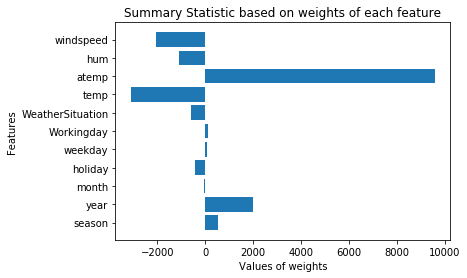

In [8]:
feature_names=['season','year','month','holiday','weekday','Workingday','WeatherSituation','temp','atemp','hum','windspeed']
plt.title('Summary Statistic based on weights of each feature')
plt.xlabel('Values of weights')
plt.ylabel('Features')
plt.barh(feature_names,reg.coef_)


In [13]:
for elements in y_pred:
    print(int(elements))
#Not to repeat Imran Khan's mistake of 0.5 people
print(y_test)
#too much error so much wow 

6163
1415
2914
4357
6836
7074
711
2105
7026
6429
2681
2142
4243
5281
2457
2070
2460
7328
5582
2818
7160
8315
5122
1277
1313
4820
1909
6765
3994
5772
3150
4120
6004
6304
5430
4928
6749
6078
3066
967
4100
3882
7164
3607
7214
2134
5241
5084
6123
4233
3330
2704
1845
5786
4882
4242
3931
2593
3845
6951
5373
6670
1913
6882
5967
7198
7224
5412
1749
6462
3129
2602
3208
4023
4639
2833
5200
4176
1165
5221
2221
2511
5885
4267
3825
4199
4403
3413
3724
3047
774
7017
5787
5183
3030
3407
4712
2676
3017
5222
7349
5051
5885
2597
2213
5553
1081
2323
7568
1249
5587
6299
3312
6681
5314
3347
1534
4368
5073
3361
5811
2842
3684
1416
4339
5930
5805
2806
2137
6031
3212
4070
5199
4767
5007
1730
5058
5947
1506
5345
3873
2412
2293
5627
4136
4447
3901
4347
2789
3634
3694
7139
2927
4440
1344
3331
4431
6867
3032
4650
5574
3016
4125
5618
2088
3109
5710
2198
3178
5823
6825
3127
1271
3890
3964
5527
4375
7763
3580
1538
486
6250
6915
4936
6421
6899
6894
2748
5315
1433
6478
3887
3966
5041
2497
1788
5874
3676
1800
5215
5371

# The Problems with this
- Without Preprocessing the loss is too much and the model is not accurate 
- The features may be dependent on each other so in that event the summary statistic may not be a good explanation

In [37]:
#defining a regressor again 
reg= linear_model.LinearRegression()
#predicting count based on all other features 
#Converting the df into a numpy array 
#X represents the input features 
#Y represents the Ouput features 

bike_data_day_np=bike_data_day.to_numpy()
#Spliting into input and output features

X=bike_data_day_np[:,2:13]
Y=bike_data_day_np[:,15]
X_scaled=normalize(X)

    


#Splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)
#fitting the model 
reg.fit(X_train,y_train)
#Predicting the values 
y_pred = reg.predict(X_test)
y_perdint=[]
for elements in y_pred:
    y_perdint.append(int(elements))
    
#As it is already intrepretable we just look at the weights within the model
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_perdint))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_perdint))

Coefficients: 
 [  7186.0900945   10564.3112469    2744.6038813   -4080.86555913
   2472.84068663  -1368.22253553  -2986.2184912   99379.11740417
 -83078.16801798  -6425.77286352 -29088.87862842]
Mean squared error: 1226905.80
Coefficient of determination: 0.68


<BarContainer object of 11 artists>

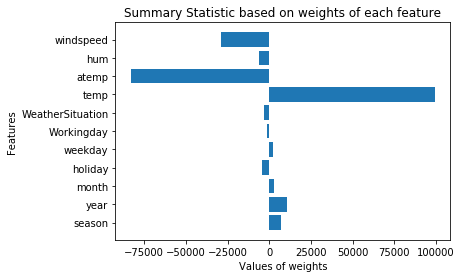

In [22]:
feature_names=['season','yr','mnth','holiday','weekday','Workingday','WeatherSit','temp','atemp','hum','windspeed']
plt.title('Summary Statistic based on weights of each feature')
plt.xlabel('Values of weights')
plt.ylabel('Features')
plt.barh(feature_names,reg.coef_)

In [32]:
type(X)

numpy.ndarray

# Slightly better

In [39]:
#we have some categorical features so we will do one-hot encoding that is we will give each category its binary column 
X_new=
Y_new=bike_data_day_np[:,15]

In [44]:
X_new[:,0]
#converting the first categorical feature to the 1-hot encoding 
#weather 
for elements in X[:,0]:
    if elements==1:
        #winter
        X_new[:,0]= 
        
    

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,